In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
startups = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/startups.csv")
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


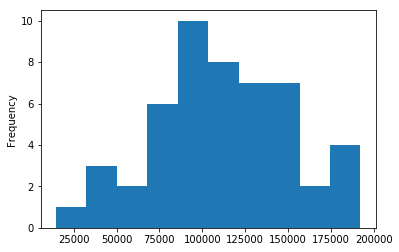

In [6]:
startups.Profit.plot.hist()

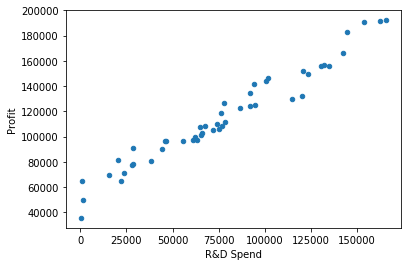

In [7]:
startups.plot.scatter("R&D Spend", "Profit")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
startups_clean = startups.fillna(startups.median())

In [27]:
X = startups_clean.iloc[:, [0]]
y = startups.Profit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [28]:
X_train.shape, X_test.shape

((35, 1), (15, 1))

In [29]:
y_train.shape, y_test.shape

((35,), (15,))

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [41]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rmse(y_train, lr.predict(X_train)), rmse(y_test, lr.predict(X_test)) 

(21161.501754677749, 10484.947885066027)

In [39]:
X = startups_clean.iloc[:, :-2]
y = startups.Profit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
rmse(y_train, lr.predict(X_train)), rmse(y_test, lr.predict(X_test)) 

(19665.963631959494, 14770.478052075912)

In [43]:
lr.intercept_, lr.coef_

(37851.828263145973, array([ 0.55800881,  0.04536395,  0.11624297]))

In [52]:
X = pd.get_dummies(startups_clean.iloc[:, :-1], drop_first=True).values
type(X)

numpy.ndarray

In [65]:
X.shape

(50, 5)

In [53]:
y = startups.Profit.values

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

(50, 20)

In [63]:
X1 = np.array([
    [2, 3, 4],
    [1, 0, 1],
    [4, 5, 6],
    [10, 12, 11]
])
pd.DataFrame(poly.fit_transform(X1))

,0,1,2,3,4,5,6,7,8
0,2.0,3.0,4.0,4.0,6.0,8.0,9.0,12.0,16.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,4.0,5.0,6.0,16.0,20.0,24.0,25.0,30.0,36.0
3,10.0,12.0,11.0,100.0,120.0,110.0,144.0,132.0,121.0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, 
                                                    y, test_size = 0.3, random_state = 1)
lr = LinearRegression()
lr.fit(X_train, y_train)
rmse(y_train, lr.predict(X_train)), rmse(y_test, lr.predict(X_test)) 

(15752.172859418639, 24621.68241899482)